In [2]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode


In [3]:
def load_csv(filepath):
    """
    Load sensor data CSV and return DataFrame without timestamp columns.
    """
    df = pd.read_csv(filepath)

    # Drop common timestamp-like columns
    # timestamp_cols = ["timestamp", "time", "datetime", "Timestamp", "Time", "Datetime","ActualTime"]
    # df.drop(columns=[col for col in timestamp_cols if col in df.columns], inplace=True)

    df.fillna(0, inplace=True)
    return df

In [4]:
df=pd.read_csv("../Data/Client_4/Copy of Copy of Subham_sitting_dw.csv")

df


,Timestamp,Gyro_x_x,Gyro_y_x,Gyro_z_x,Acc_x_x,Acc_y_x,Acc_z_x,Gyro_x_y,Gyro_y_y,Gyro_z_y,Acc_x_y,Acc_y_y,Acc_z_y,combined_action_num
0,2024-06-13 19:55:46,0.190590,0.172264,-0.323759,-3.323152,-7.886500,5.595249,221.994624,-216.043011,-94.537634,-7642.209677,-96.951613,-1097.629032,7
1,2024-06-13 19:55:46,-0.219911,0.212581,-0.140499,-3.081338,-8.463503,4.592079,285.973118,-304.215054,3.311828,-7647.048387,-72.758065,-1112.145161,7
2,2024-06-13 19:55:46,-0.219911,0.212581,-0.140499,-3.081338,-8.463503,4.592079,-676.123457,-169.975309,-445.666667,-7797.728395,-177.320988,-768.432099,7
3,2024-06-13 19:55:46,0.458149,0.096517,-0.043982,-2.576161,-8.638280,5.008670,8.375000,529.625000,-253.000000,-8142.625000,-220.500000,-1133.000000,7
4,2024-06-13 19:55:46,0.458149,0.096517,-0.043982,-2.576161,-8.638280,5.008670,162.369565,-339.869565,253.304348,-7983.760870,-77.608696,-726.652174,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2024-06-13 19:57:03,-3.583336,-0.783129,-0.758695,-7.304709,-5.054160,4.302381,-270.666667,467.722222,63.111111,-7891.055556,1354.055556,80.833333,7
768,2024-06-13 19:57:03,-3.583336,-0.783129,-0.758695,-7.304709,-5.054160,4.302381,98.356322,571.770115,-588.540230,-7896.850575,1178.195402,-252.471264,7
769,2024-06-13 19:57:03,-2.364048,-1.739744,-2.662151,-5.379771,-12.251130,6.327875,-559.200000,-296.400000,-1390.800000,-7833.133333,1294.066667,-360.733333,7
770,2024-06-13 19:57:03,0.383623,-1.279152,-1.376890,2.123657,-8.228871,3.869030,-329.023529,-260.411765,-1370.611765,-8224.176471,650.964706,-287.164706,7


In [5]:
df=df.iloc[:1000
        ]
df

,Timestamp,Gyro_x_x,Gyro_y_x,Gyro_z_x,Acc_x_x,Acc_y_x,Acc_z_x,Gyro_x_y,Gyro_y_y,Gyro_z_y,Acc_x_y,Acc_y_y,Acc_z_y,combined_action_num
0,2024-06-13 19:55:46,0.190590,0.172264,-0.323759,-3.323152,-7.886500,5.595249,221.994624,-216.043011,-94.537634,-7642.209677,-96.951613,-1097.629032,7
1,2024-06-13 19:55:46,-0.219911,0.212581,-0.140499,-3.081338,-8.463503,4.592079,285.973118,-304.215054,3.311828,-7647.048387,-72.758065,-1112.145161,7
2,2024-06-13 19:55:46,-0.219911,0.212581,-0.140499,-3.081338,-8.463503,4.592079,-676.123457,-169.975309,-445.666667,-7797.728395,-177.320988,-768.432099,7
3,2024-06-13 19:55:46,0.458149,0.096517,-0.043982,-2.576161,-8.638280,5.008670,8.375000,529.625000,-253.000000,-8142.625000,-220.500000,-1133.000000,7
4,2024-06-13 19:55:46,0.458149,0.096517,-0.043982,-2.576161,-8.638280,5.008670,162.369565,-339.869565,253.304348,-7983.760870,-77.608696,-726.652174,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2024-06-13 19:57:03,-3.583336,-0.783129,-0.758695,-7.304709,-5.054160,4.302381,-270.666667,467.722222,63.111111,-7891.055556,1354.055556,80.833333,7
768,2024-06-13 19:57:03,-3.583336,-0.783129,-0.758695,-7.304709,-5.054160,4.302381,98.356322,571.770115,-588.540230,-7896.850575,1178.195402,-252.471264,7
769,2024-06-13 19:57:03,-2.364048,-1.739744,-2.662151,-5.379771,-12.251130,6.327875,-559.200000,-296.400000,-1390.800000,-7833.133333,1294.066667,-360.733333,7
770,2024-06-13 19:57:03,0.383623,-1.279152,-1.376890,2.123657,-8.228871,3.869030,-329.023529,-260.411765,-1370.611765,-8224.176471,650.964706,-287.164706,7


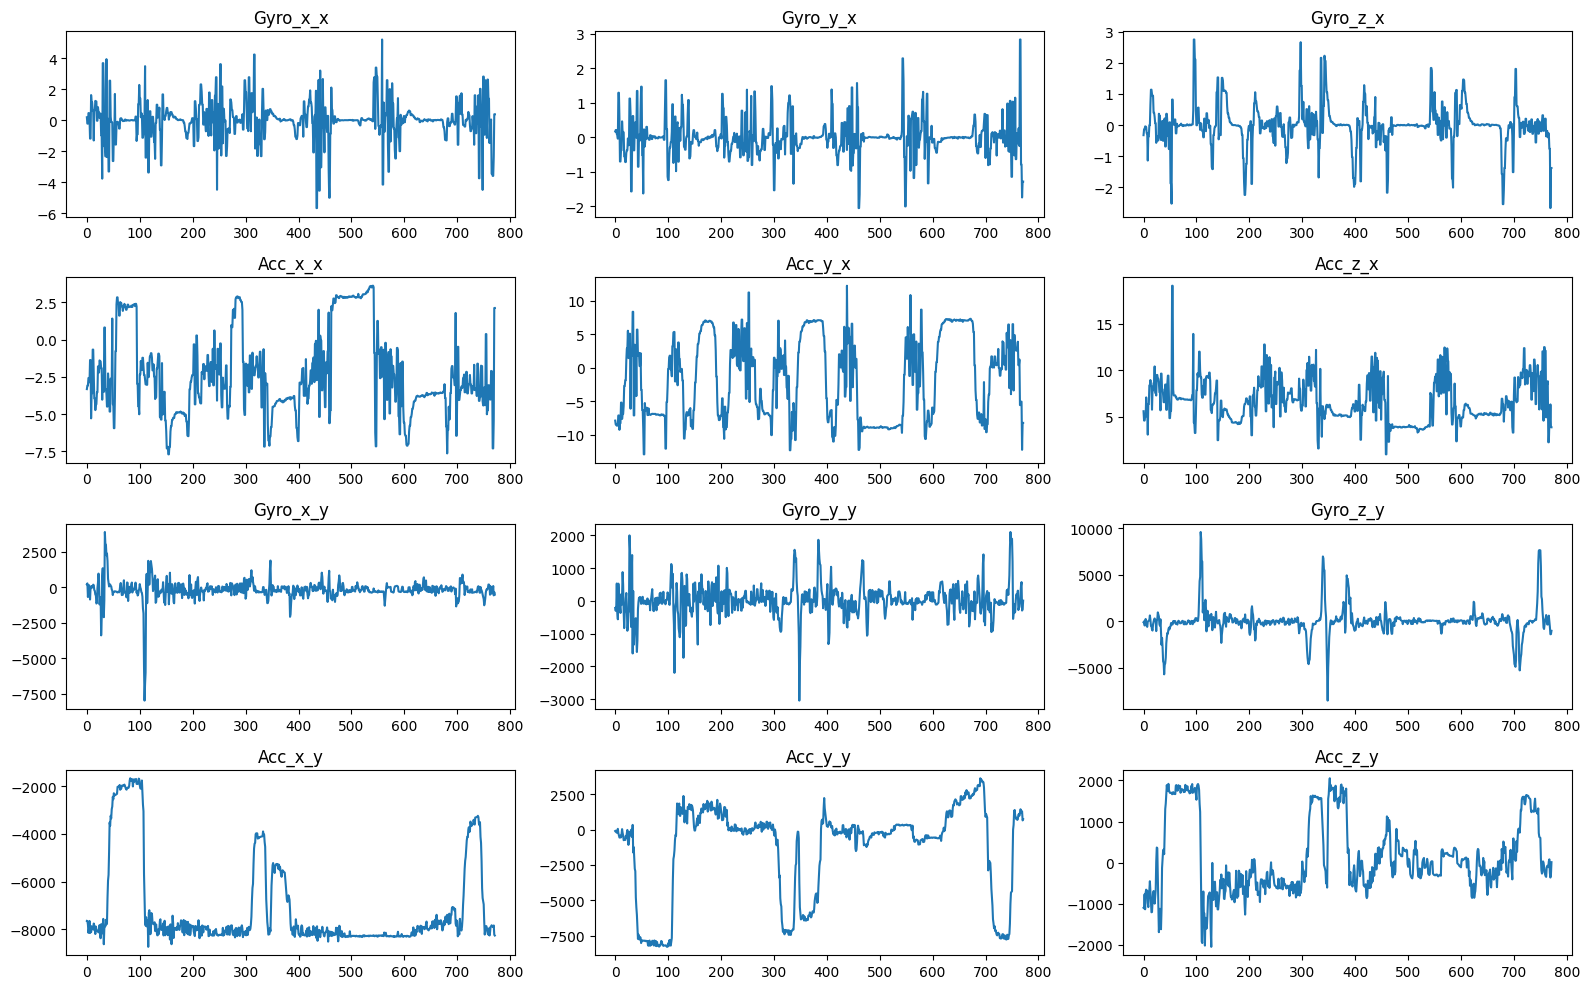

In [6]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Gyro_x_x", "Gyro_y_x", "Gyro_z_x", "Acc_x_x", "Acc_y_x", "Acc_z_x",
    "Gyro_x_y", "Gyro_y_y", "Gyro_z_y", "Acc_x_y", "Acc_y_y", "Acc_z_y"
]

# Plot each sensor signal
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

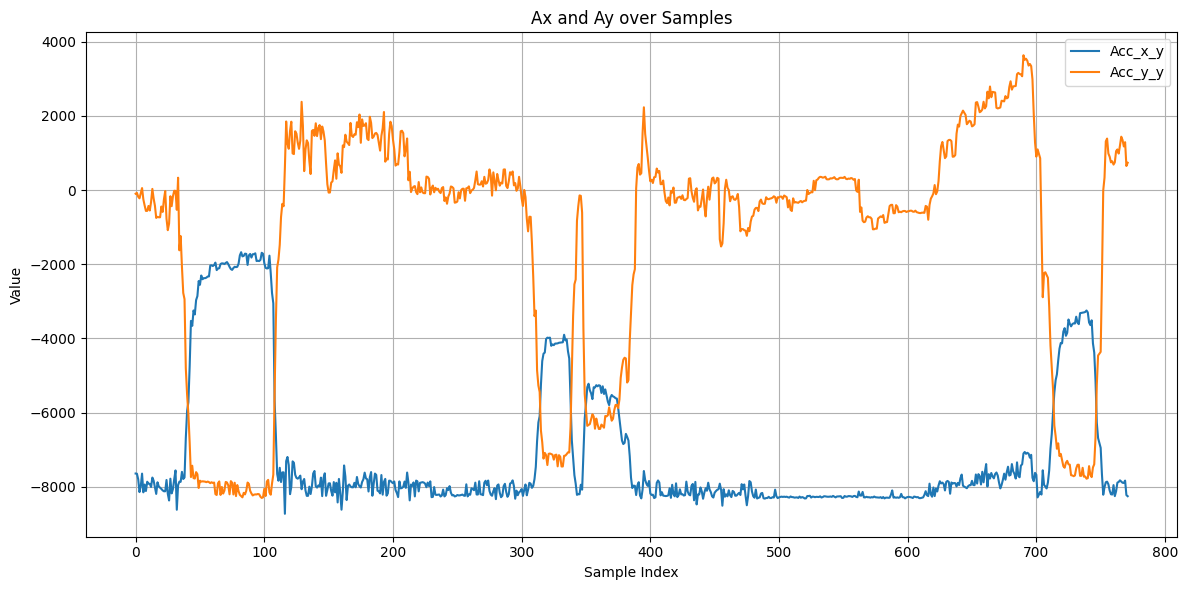

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["Acc_x_y"], label="Acc_x_y")
plt.plot(df["Acc_y_y"], label="Acc_y_y")
# plt.plot(df["Acc_z_y"], label="Acc_z_y")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df1 = pd.read_csv(r"C:\Users\mohit\Desktop\SAI DATA FOR TEST\Sai_Labeled_Data\SaiSittingDWwoBuffer.csv")

df1.head()

,ActualTime,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense,Combined_Action_Sum
0,2025-06-27 16:03:05.562,-4.955997,-8.995016,3.426103,-0.384845,-0.731817,-0.794125,-7099,-3970,3961,-2736,888,1559,7
1,2025-06-27 16:03:05.647,-3.670311,-8.729259,5.602432,-0.452040,-0.844216,-0.445932,-7057,-4077,3935,-991,-103,502,7
2,2025-06-27 16:03:05.748,-2.317587,-9.753978,5.513846,0.072082,-0.864985,0.000000,-7078,-3547,3667,-321,158,515,7
3,2025-06-27 16:03:05.848,-2.317587,-9.753978,5.513846,0.072082,-0.864985,0.000000,-7470,-3680,3407,-754,1143,789,7
4,2025-06-27 16:03:05.948,-1.206678,-11.259931,8.030152,1.904678,-0.244346,-0.259007,-7470,-3680,3407,-754,1143,789,7


In [9]:
# df1_temp = df1.iloc[:500]
df1_temp = df1

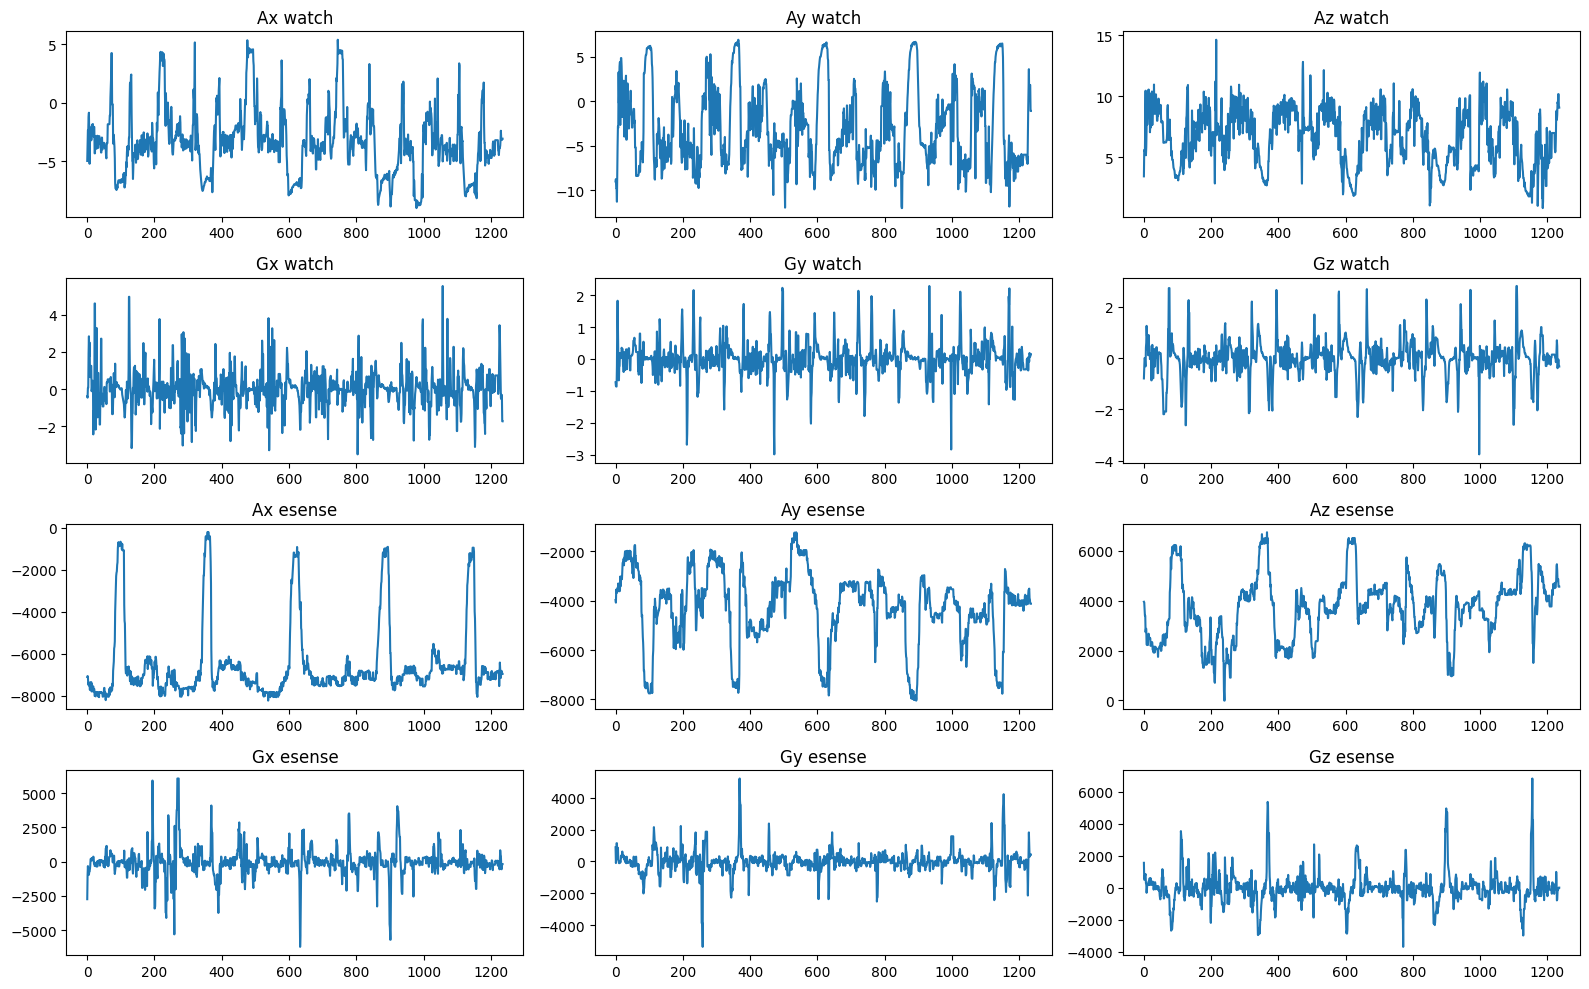

In [10]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Ax watch", "Ay watch", "Az watch", "Gx watch", "Gy watch", "Gz watch",
    "Ax esense", "Ay esense", "Az esense", "Gx esense", "Gy esense", "Gz esense"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df1_temp[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

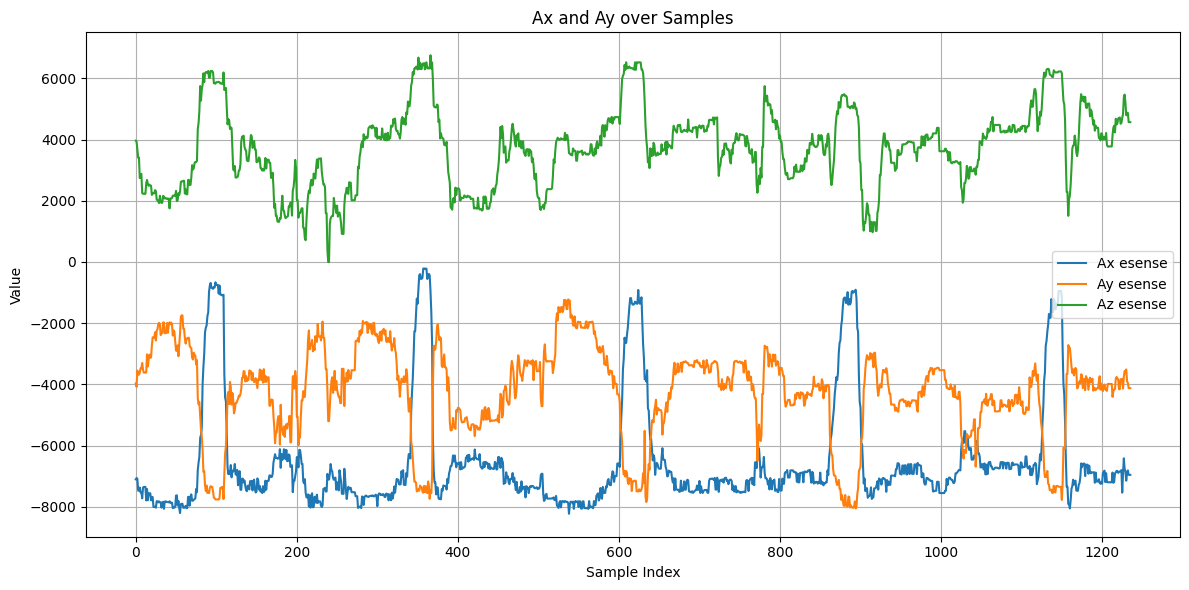

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1_temp["Ax esense"], label="Ax esense")
plt.plot(df1_temp["Ay esense"], label="Ay esense")
plt.plot(df1_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df2 = pd.read_csv(r"C:\Users\mohit\Desktop\SAI DATA FOR TEST\Sai_Labeled_Data\SaiSittingDWwBuffer.csv")

df2

,ActualTime,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense,Combined_Action_Sum
0,2025-06-27 16:03:06.040,-0.840365,-7.838616,10.457873,2.838080,1.165531,-0.323759,-7078,-3547,3667,-321,158,515,7
1,2025-06-27 16:03:06.136,-3.181894,-5.001487,5.157111,1.750740,1.822822,0.415388,-7470,-3680,3407,-754,1143,789,7
2,2025-06-27 16:03:06.335,-3.557784,-2.980781,7.364564,1.122770,-0.216246,1.255939,-7367,-3610,2743,-953,430,855,7
3,2025-06-27 16:03:06.437,-2.090138,3.241749,10.151415,0.648739,-0.669508,0.861320,-7525,-3473,2876,-705,857,284,7
4,2025-06-27 16:03:06.644,-2.724602,2.509123,8.370130,1.252274,-0.213803,0.338419,-7719,-3300,2251,-532,102,-316,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2025-06-27 16:05:08.645,-2.377442,0.067038,9.512163,-0.461814,-0.079412,-0.394619,-6413,-3744,5378,167,-660,469,7
818,2025-06-27 16:05:08.740,-3.055001,1.309628,9.397242,-0.525344,0.185703,-0.205251,-6760,-3563,5468,836,994,-793,7
819,2025-06-27 16:05:08.838,-3.167529,1.814805,10.177752,-0.304211,0.073304,-0.059865,-6843,-3563,5210,494,1820,-741,7
820,2025-06-27 16:05:09.037,-3.057395,-1.096544,9.066842,-1.722640,0.147829,-0.329867,-6882,-3896,4875,-217,308,-111,7


In [13]:
# df2_temp = df2.iloc[:1000]
df2_temp = df2
df2_temp.head()

,ActualTime,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense,Combined_Action_Sum
0,2025-06-27 16:03:06.040,-0.840365,-7.838616,10.457873,2.838080,1.165531,-0.323759,-7078,-3547,3667,-321,158,515,7
1,2025-06-27 16:03:06.136,-3.181894,-5.001487,5.157111,1.750740,1.822822,0.415388,-7470,-3680,3407,-754,1143,789,7
2,2025-06-27 16:03:06.335,-3.557784,-2.980781,7.364564,1.122770,-0.216246,1.255939,-7367,-3610,2743,-953,430,855,7
3,2025-06-27 16:03:06.437,-2.090138,3.241749,10.151415,0.648739,-0.669508,0.861320,-7525,-3473,2876,-705,857,284,7
4,2025-06-27 16:03:06.644,-2.724602,2.509123,8.370130,1.252274,-0.213803,0.338419,-7719,-3300,2251,-532,102,-316,7


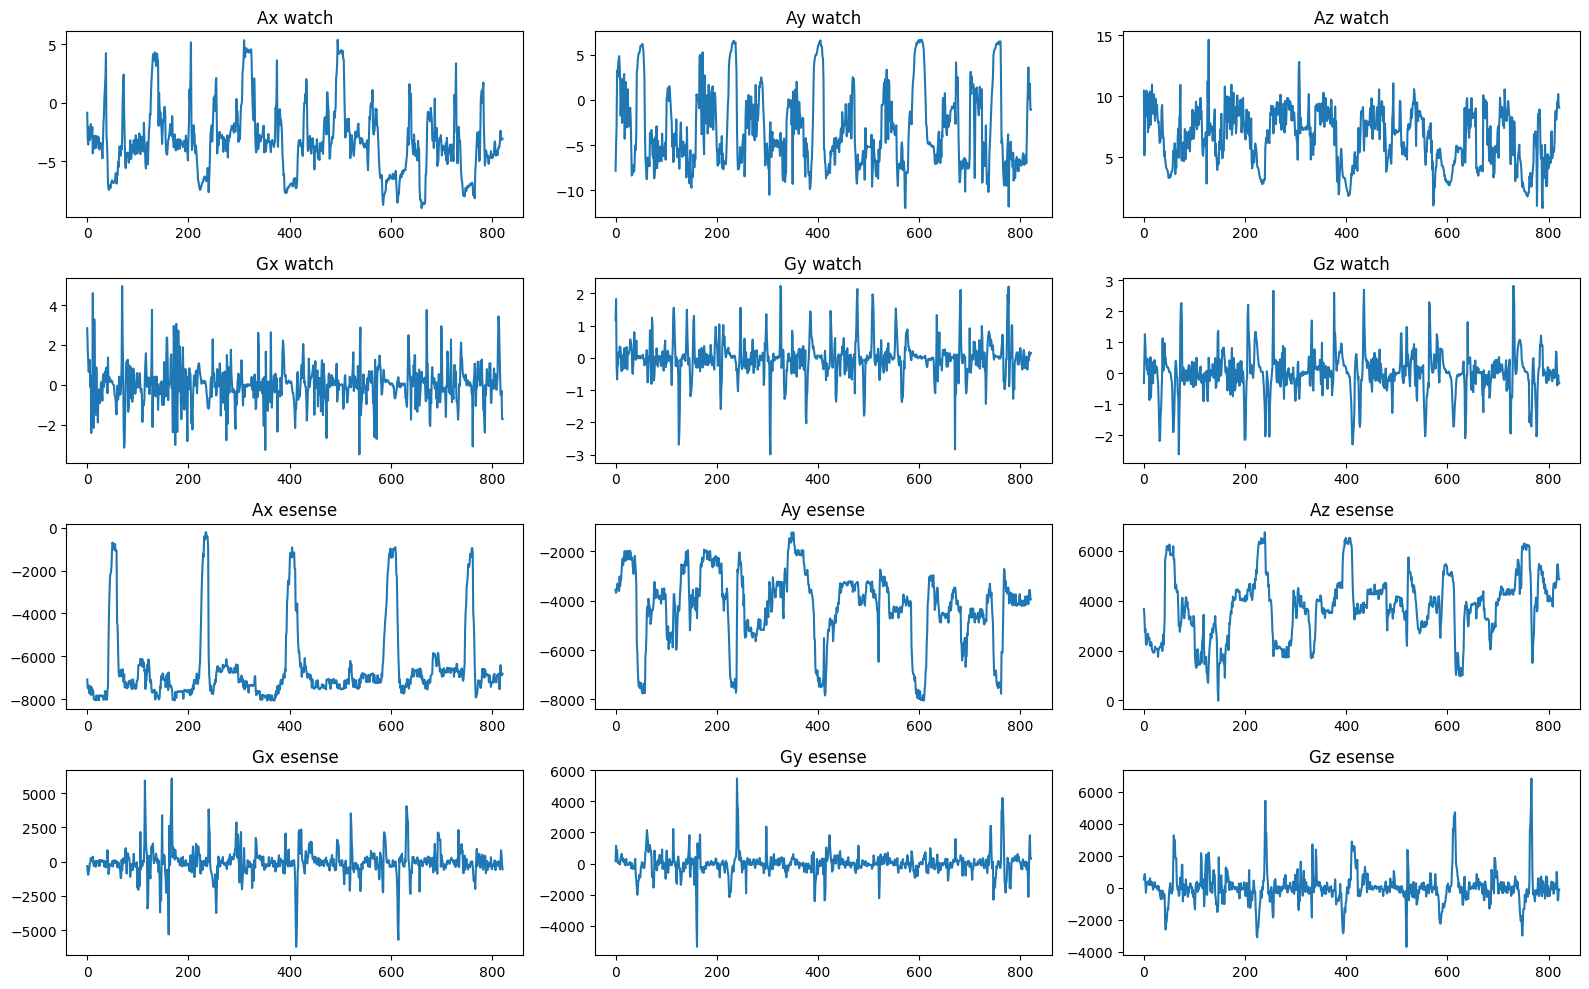

In [14]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Ax watch", "Ay watch", "Az watch", "Gx watch", "Gy watch", "Gz watch",
    "Ax esense", "Ay esense", "Az esense", "Gx esense", "Gy esense", "Gz esense"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df2_temp[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

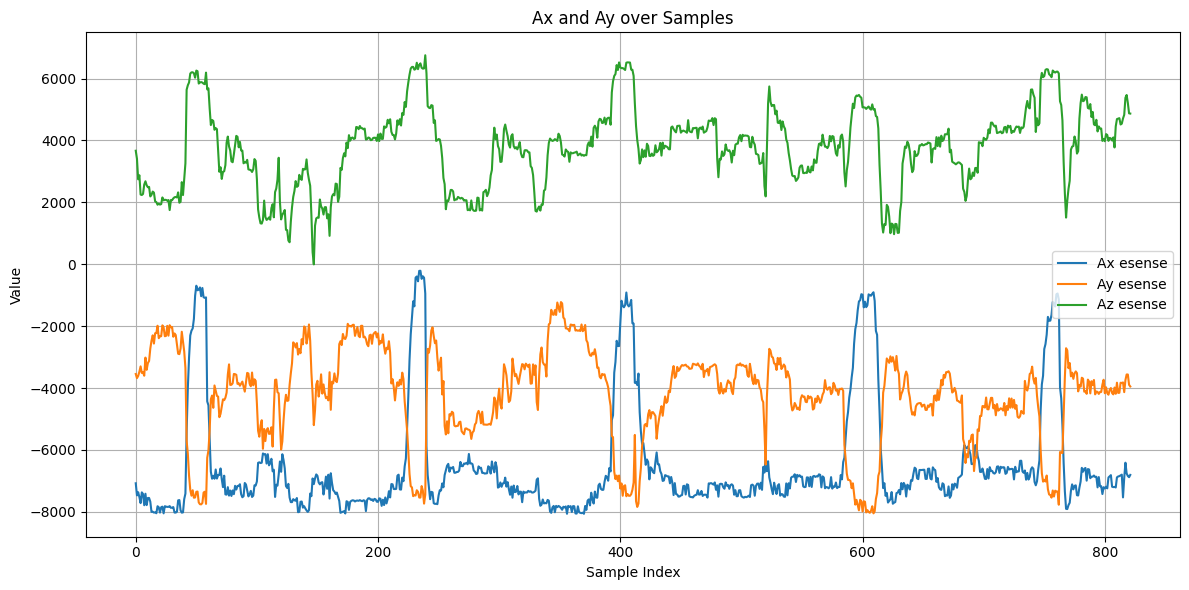

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df2_temp["Ax esense"], label="Ax esense")
plt.plot(df2_temp["Ay esense"], label="Ay esense")
plt.plot(df2_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df3 = pd.read_csv(r"C:\Users\mohit\Desktop\Mohit Data For Test\Mohit_Labeled_Data\MohitSittingDrinkingWaterwoBuffer.csv")

In [17]:
df3

,ActualTime,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense,Combined_Action_Sum
0,2025-06-27 16:44:35.685,1.606509,-6.749255,6.172252,-0.061087,0.094073,0.102625,-8206,-1191,1924,-100,-127,-7,7
1,2025-06-27 16:44:35.785,1.094150,-7.086837,6.947973,-0.116064,-0.009774,-0.048869,-8206,-1191,1924,-100,-127,-7,7
2,2025-06-27 16:44:35.902,1.079785,-7.108385,6.569689,-0.161268,0.040317,0.018326,-8206,-1191,1924,-100,-127,-7,7
3,2025-06-27 16:44:35.981,1.106121,-7.290344,6.519411,-0.237016,0.017104,-0.015882,-8273,-1216,1953,38,-100,-62,7
4,2025-06-27 16:44:36.099,1.345541,-7.053318,6.385336,-0.031765,0.101404,-0.010996,-8222,-1398,2125,-96,-83,-110,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2025-06-27 16:46:37.805,-1.091756,-2.260126,8.418014,-0.499688,-0.147829,-0.188147,-7872,-1196,1708,-125,-73,49,7
1222,2025-06-27 16:46:37.902,-1.091756,-2.260126,8.418014,-0.499688,-0.147829,-0.188147,-8196,-1219,2101,27,-339,-70,7
1223,2025-06-27 16:46:37.980,-1.091756,-2.260126,8.418014,-0.499688,-0.147829,-0.188147,-8244,-1407,2109,-103,-104,378,7
1224,2025-06-27 16:46:38.109,-0.505177,-2.753332,9.835381,-0.662178,0.288328,-0.101404,-8275,-1309,2127,-33,-111,525,7


In [18]:
df3_temp = df3.iloc[:1000]

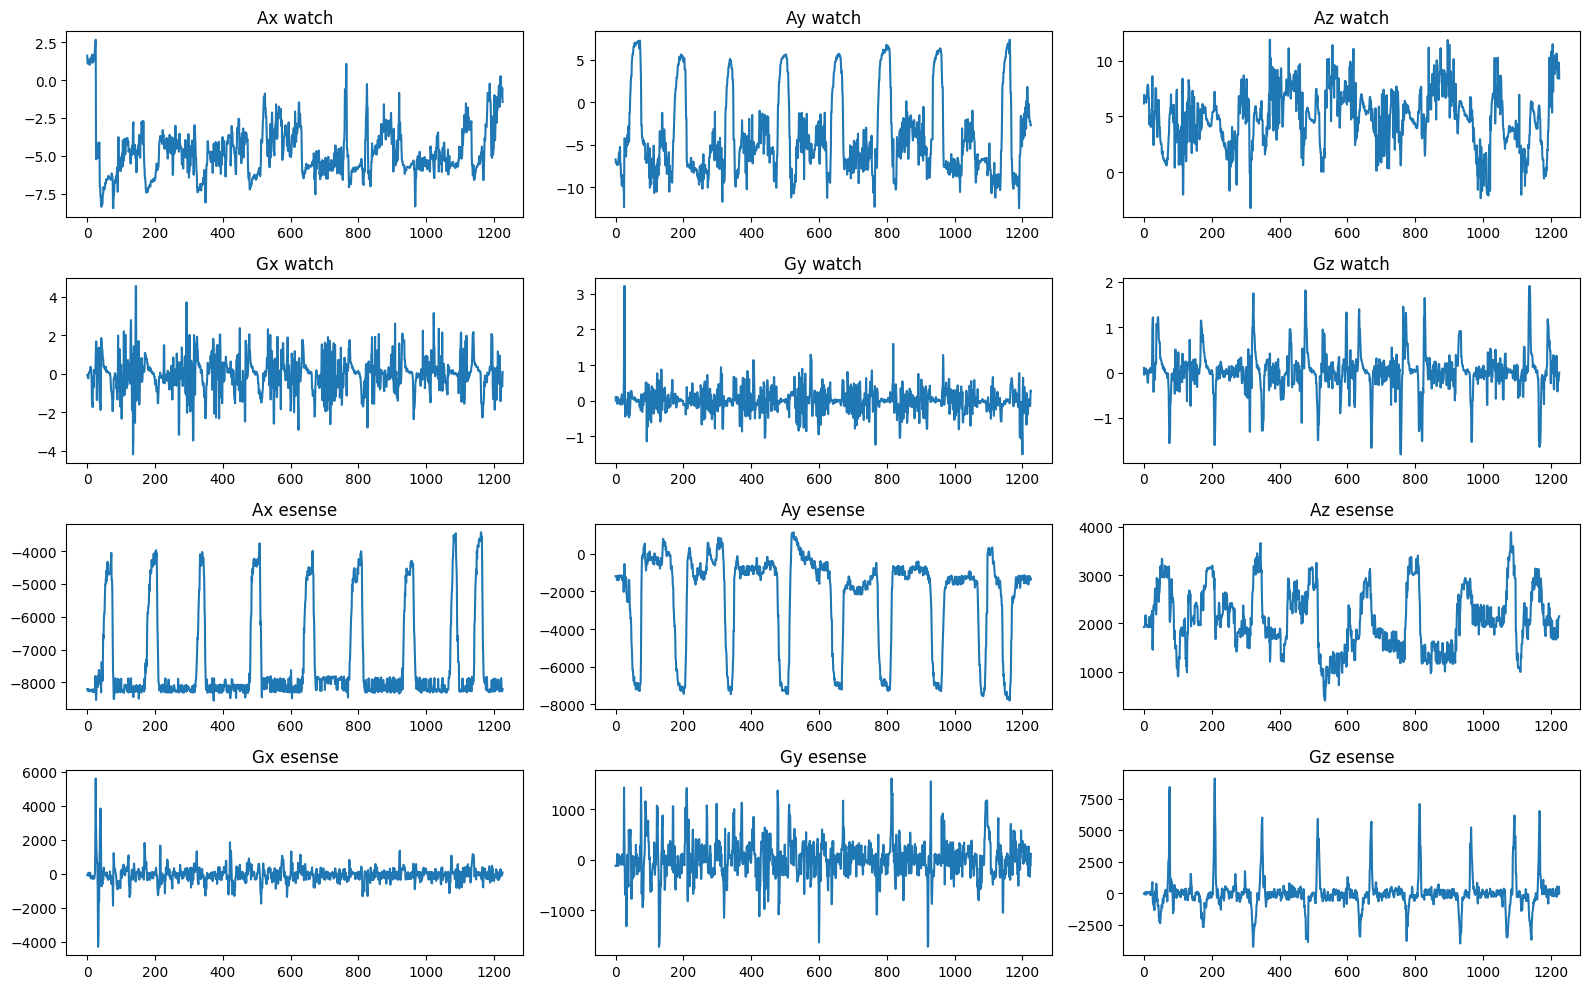

In [19]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Ax watch", "Ay watch", "Az watch", "Gx watch", "Gy watch", "Gz watch",
    "Ax esense", "Ay esense", "Az esense", "Gx esense", "Gy esense", "Gz esense"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df3[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

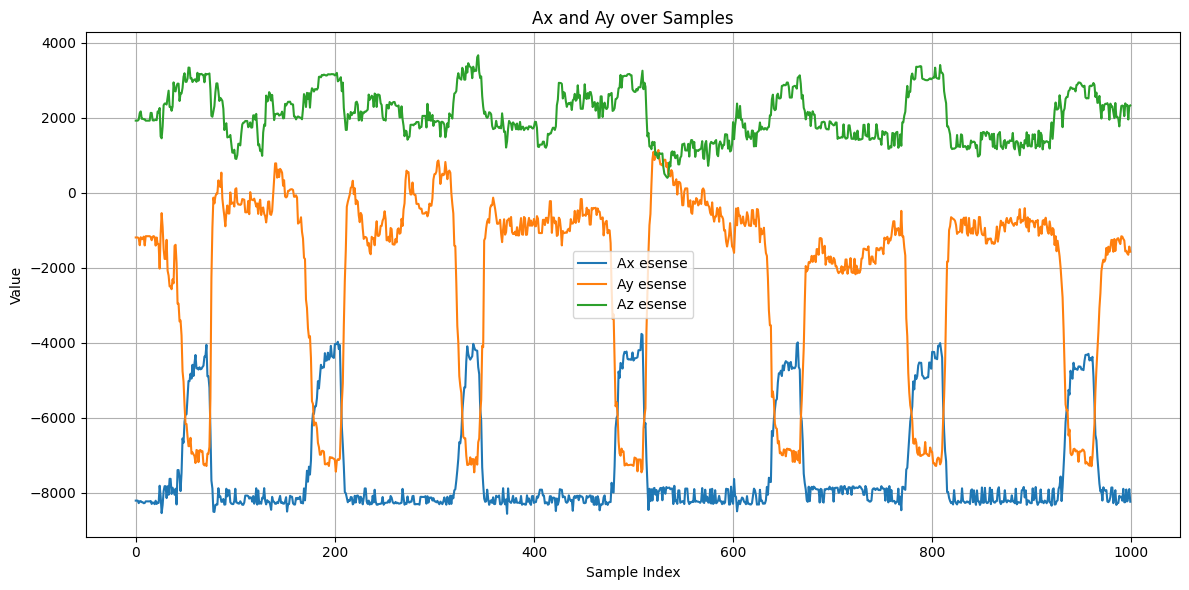

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df3_temp["Ax esense"], label="Ax esense")
plt.plot(df3_temp["Ay esense"], label="Ay esense")
plt.plot(df3_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df4 = pd.read_csv(r"C:\Users\mohit\Downloads\28.6.25\Sharmad\SharmadSittingDrinkingwoBuffer31.csv")
df4

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-06-27 14:58:02.304,2025-06-27T14:58:01.836273,-0.028730,-9.294291,3.363853,-0.010996,-0.008552,-0.010996,2025-06-27T14:58:02.257,-7966,-1388,348,-338,-90,89
1,2,2025-06-27 14:58:02.407,2025-06-27T14:58:01.836273,-0.028730,-9.294291,3.363853,-0.010996,-0.008552,-0.010996,2025-06-27T14:58:02.333,-7678,-1404,362,-290,-69,94
2,3,2025-06-27 14:58:02.524,2025-06-27T14:58:02.038266,0.026336,-9.112331,3.490746,0.013439,0.006109,0.015882,2025-06-27T14:58:02.502,-7940,-1401,347,-281,-63,87
3,4,2025-06-27 14:58:02.618,2025-06-27T14:58:02.127090,-0.105345,-9.255983,3.605668,-0.004887,0.039095,-0.010996,2025-06-27T14:58:02.502,-7940,-1401,347,-281,-63,87
4,5,2025-06-27 14:58:02.724,2025-06-27T14:58:02.237089,-0.002394,-9.023746,3.720589,0.010996,0.002443,0.000000,2025-06-27T14:58:02.701,-7677,-1381,320,-261,270,-285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1238,2025-06-27 15:00:06.004,2025-06-27T15:00:05.727171,-6.629545,-5.805939,4.647145,-1.142318,0.659734,-0.679282,2025-06-27T15:00:06.003,-7601,161,1053,-1138,1632,107
1238,1239,2025-06-27 15:00:06.115,2025-06-27T15:00:05.827148,-6.045359,-8.339005,3.665523,0.948063,0.800233,-0.918741,2025-06-27T15:00:06.083,-8239,-124,537,-688,2328,843
1239,1240,2025-06-27 15:00:06.211,2025-06-27T15:00:05.927170,-5.963956,-5.295974,5.214571,3.648087,0.897972,-1.692097,2025-06-27T15:00:06.190,-7918,553,81,265,1041,426
1240,1241,2025-06-27 15:00:06.312,2025-06-27T15:00:06.027105,-3.543418,-9.275137,3.098097,0.530231,0.581544,-2.054951,2025-06-27T15:00:06.282,-7600,661,33,553,607,937


In [22]:
df4_temp = df4.iloc[600:1242]
df4_temp

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
600,601,2025-06-27 14:59:02.323,2025-06-27T14:59:01.927430,-7.390901,0.124498,5.480328,0.042761,0.070860,1.141096,2025-06-27T14:59:02.279,-8000,-556,202,-24,-231,-1880
601,602,2025-06-27 14:59:02.403,2025-06-27T14:59:02.145620,-6.777985,2.061408,5.193024,0.437380,-0.026878,0.646295,2025-06-27T14:59:02.371,-8028,-778,251,364,-180,-1901
602,603,2025-06-27 14:59:02.504,2025-06-27T14:59:02.145620,-6.777985,2.061408,5.193024,0.437380,-0.026878,0.646295,2025-06-27T14:59:02.465,-7983,-965,543,173,-291,-1596
603,604,2025-06-27 14:59:02.614,2025-06-27T14:59:02.231994,-6.921637,2.815581,5.418078,0.228464,0.023213,0.405615,2025-06-27T14:59:02.534,-8012,-1543,519,164,-309,-1229
604,605,2025-06-27 14:59:02.717,2025-06-27T14:59:02.427587,-7.218518,4.242526,4.793192,0.608422,-0.050091,0.290772,2025-06-27T14:59:02.649,-7679,-1446,624,377,53,-1376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1238,2025-06-27 15:00:06.004,2025-06-27T15:00:05.727171,-6.629545,-5.805939,4.647145,-1.142318,0.659734,-0.679282,2025-06-27T15:00:06.003,-7601,161,1053,-1138,1632,107
1238,1239,2025-06-27 15:00:06.115,2025-06-27T15:00:05.827148,-6.045359,-8.339005,3.665523,0.948063,0.800233,-0.918741,2025-06-27T15:00:06.083,-8239,-124,537,-688,2328,843
1239,1240,2025-06-27 15:00:06.211,2025-06-27T15:00:05.927170,-5.963956,-5.295974,5.214571,3.648087,0.897972,-1.692097,2025-06-27T15:00:06.190,-7918,553,81,265,1041,426
1240,1241,2025-06-27 15:00:06.312,2025-06-27T15:00:06.027105,-3.543418,-9.275137,3.098097,0.530231,0.581544,-2.054951,2025-06-27T15:00:06.282,-7600,661,33,553,607,937


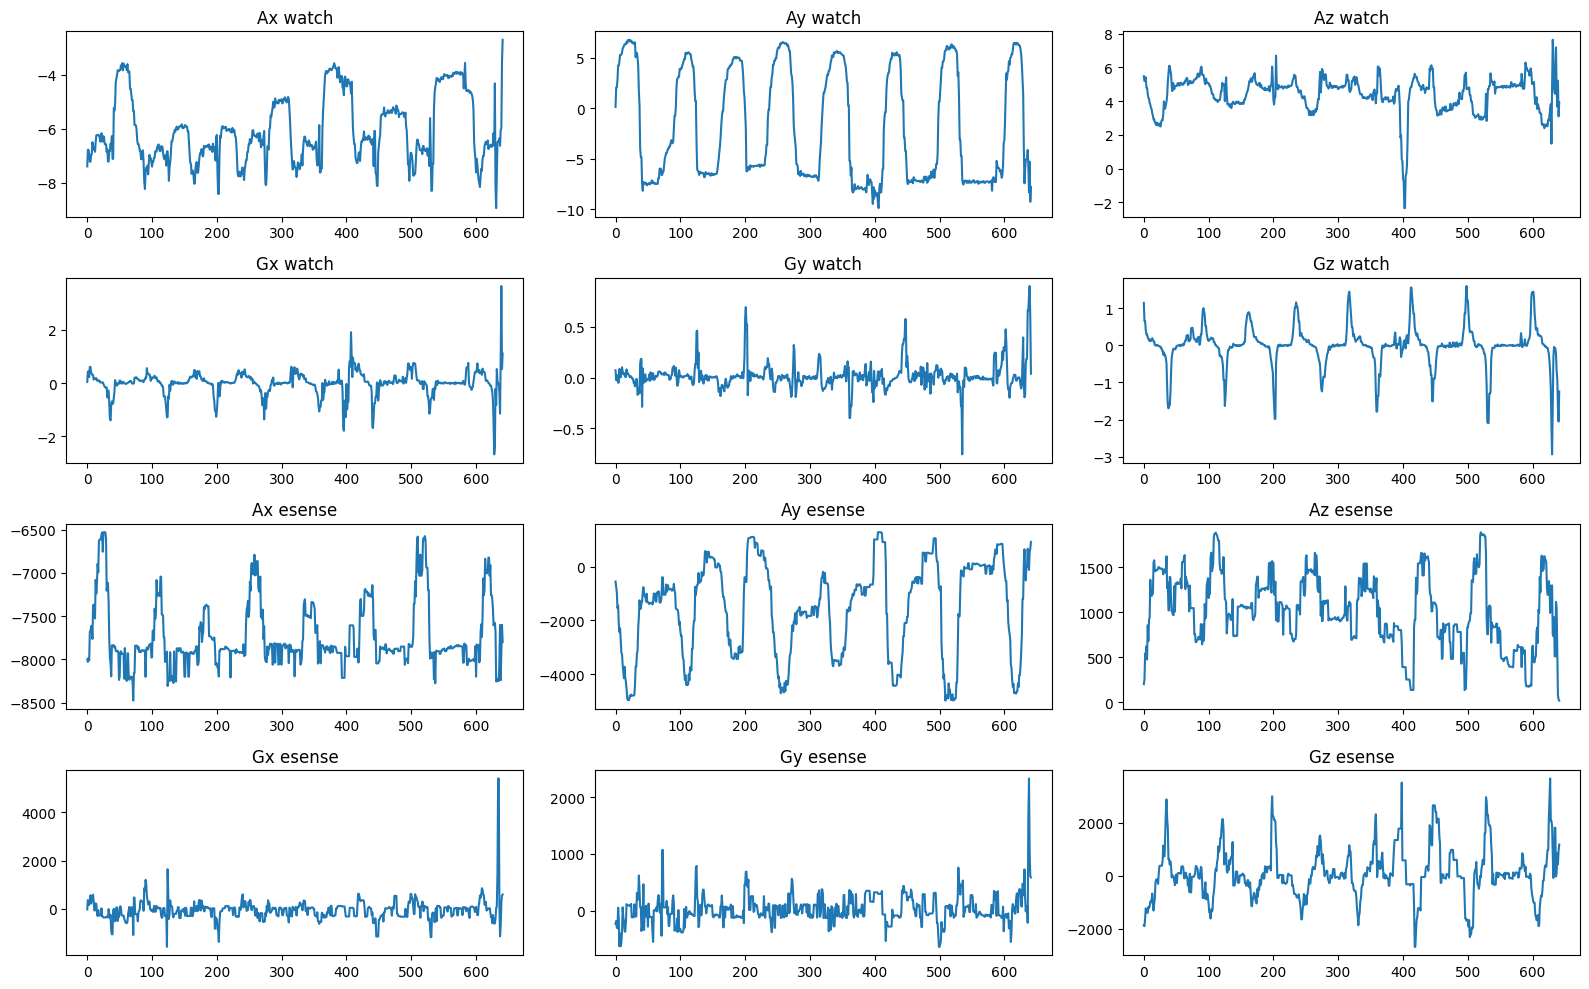

In [23]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Ax watch", "Ay watch", "Az watch", "Gx watch", "Gy watch", "Gz watch",
    "Ax esense", "Ay esense", "Az esense", "Gx esense", "Gy esense", "Gz esense"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df4_temp[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

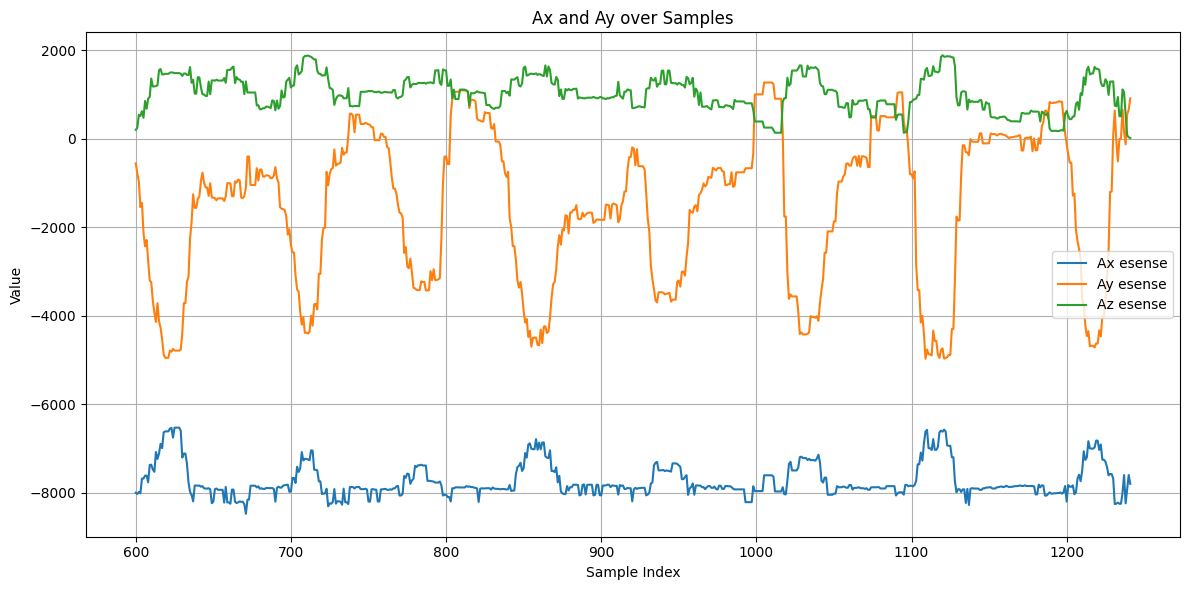

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df4_temp["Ax esense"], label="Ax esense")
plt.plot(df4_temp["Ay esense"], label="Ay esense")
plt.plot(df4_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df4 = pd.read_csv(r"C:\Users\mohit\Downloads\dataensense.csv")

df4

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz
0,1.751350e+12,-15850,1427,-2333,319,982,691
1,1.751350e+12,-15858,1633,-2035,343,1296,591
2,1.751350e+12,-16196,1566,-1983,380,1189,185
3,1.751350e+12,-16202,1205,-2171,147,1236,183
4,1.751350e+12,-16249,1214,-2152,208,1550,512
...,...,...,...,...,...,...,...
2706,1.751350e+12,-16119,3689,-1201,786,120,704
2707,1.751350e+12,-16083,3695,-1404,834,-265,884
2708,1.751350e+12,-16041,3680,-1320,644,-182,493
2709,1.751350e+12,-16231,3458,-1303,686,-530,396


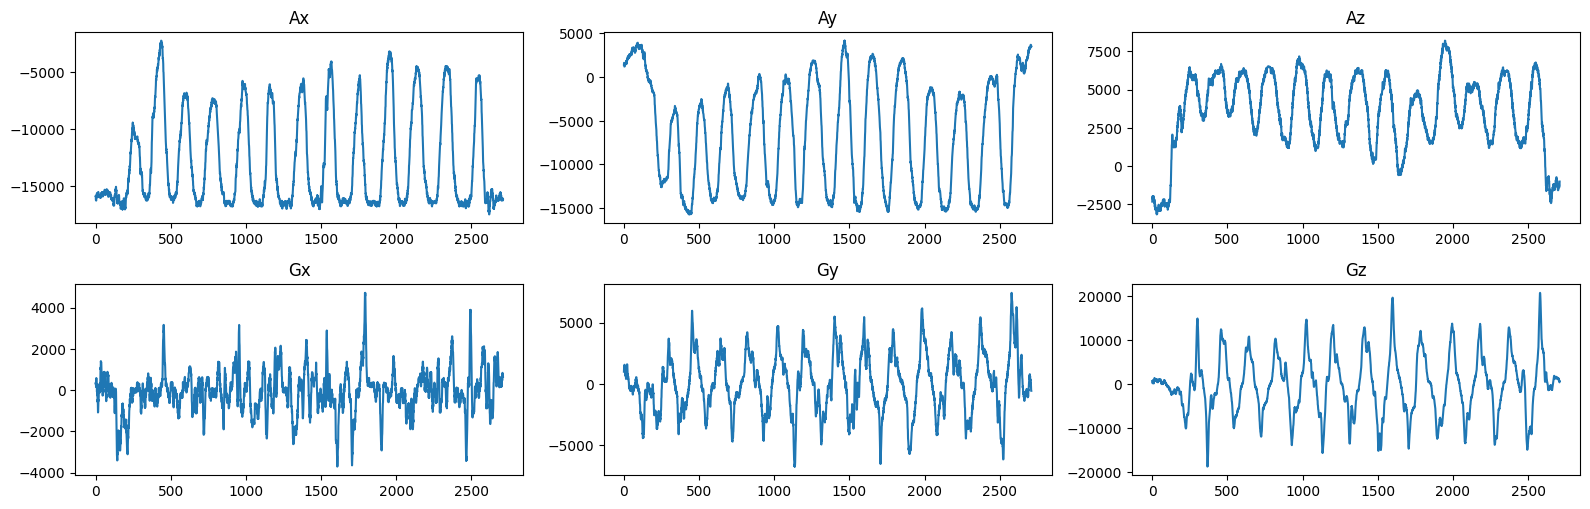

In [26]:
import matplotlib.pyplot as plt

# Select the columns to plot
columns = [
    "Ax", "Ay", "Az", "Gx", "Gy", "Gz"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df4[col].values)
    plt.title(col)
    plt.tight_layout()

plt.show()

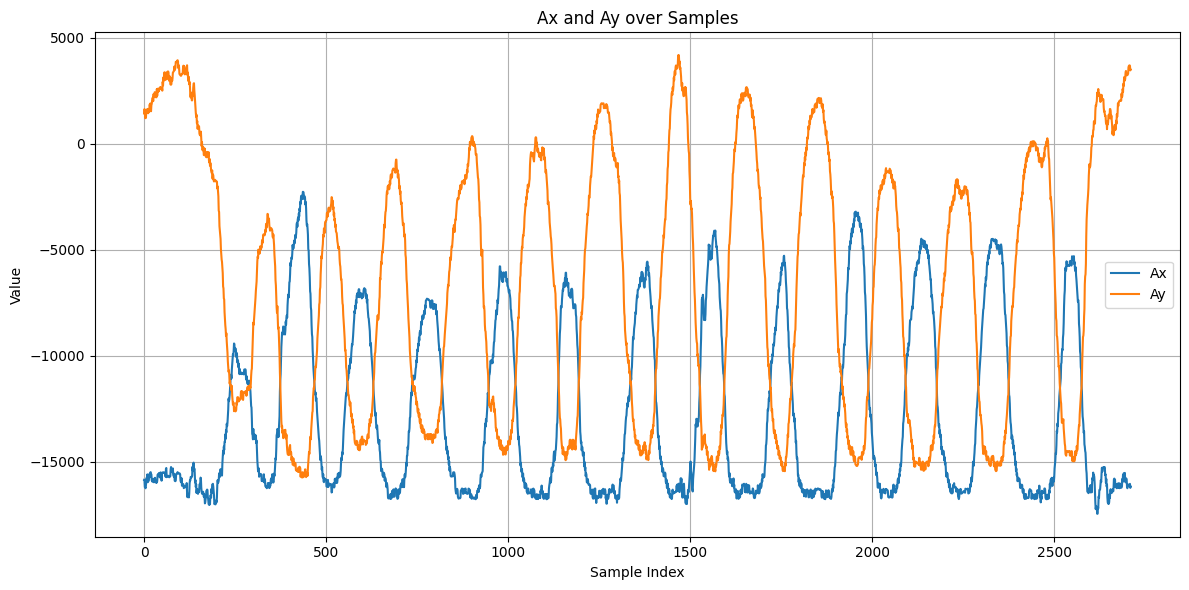

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df4["Ax"], label="Ax")
plt.plot(df4["Ay"], label="Ay")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# df5 = pd.read_csv(r"C:\Users\mohit\Downloads\myData.csv")

# df5

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohit\\Downloads\\myData.csv'

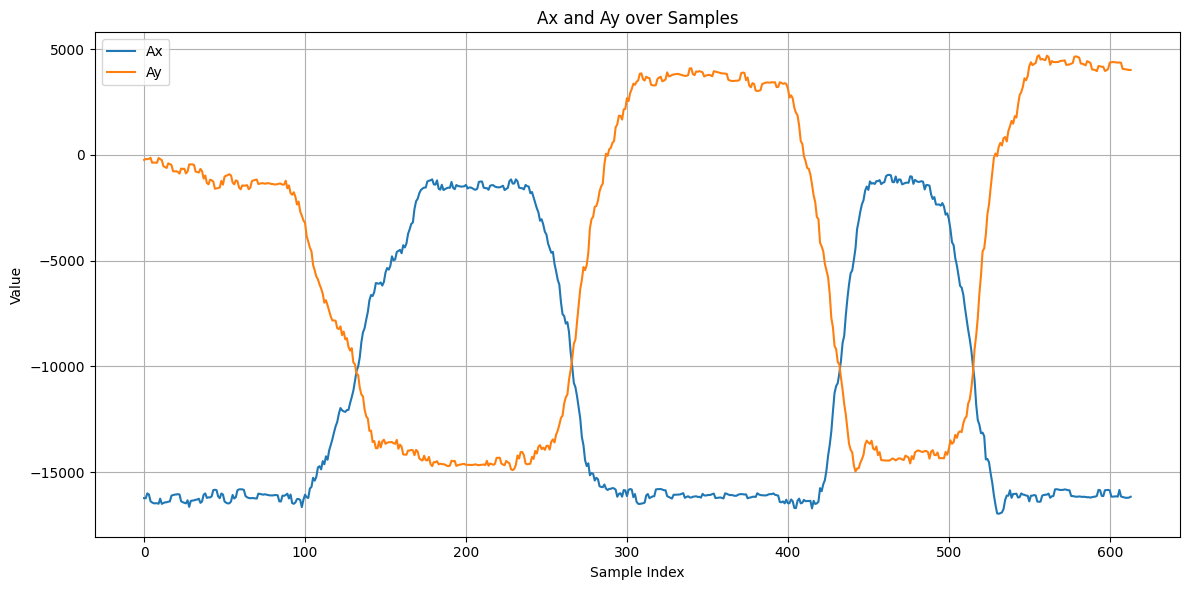

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(df5["Ax"], label="Ax")
# plt.plot(df5["Ay"], label="Ay")
# plt.title("Ax and Ay over Samples")
# plt.xlabel("Sample Index")
# plt.ylabel("Value")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [29]:
df6 = pd.read_csv(r"C:\Users\mohit\Downloads\Arnav\arnabsittingdrinkingwoBuffer7.csv")

df6 

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-06-27 12:50:49.653,2025-06-27T12:50:49.264012,4.472369,-6.809110,5.638345,-0.006109,-0.002443,-0.013439,2025-06-27T12:50:49.619,-7413,-2773,4464,62,-70,-40
1,2,2025-06-27 12:50:49.782,2025-06-27T12:50:49.463456,4.558560,-6.950367,5.566519,-0.006109,0.002443,0.004887,2025-06-27T12:50:49.742,-7382,-2787,4310,72,8,-52
2,3,2025-06-27 12:50:49.870,2025-06-27T12:50:49.463456,4.558560,-6.950367,5.566519,-0.006109,0.002443,0.004887,2025-06-27T12:50:49.806,-7453,-2816,4311,97,-294,100
3,4,2025-06-27 12:50:49.965,2025-06-27T12:50:49.665329,5.834670,-9.524135,6.818686,-0.684169,0.695165,2.063503,2025-06-27T12:50:49.929,-7718,-2857,4248,284,350,308
4,5,2025-06-27 12:50:50.065,2025-06-27T12:50:49.739906,4.122815,-12.995727,8.087613,-0.171042,0.775799,1.001819,2025-06-27T12:50:49.929,-7718,-2857,4248,284,350,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1250,2025-06-27 12:52:54.554,2025-06-27T12:52:54.138810,-1.640028,-0.251391,9.866506,0.806342,-0.212581,0.420275,2025-06-27T12:52:54.471,-7739,-3164,3549,-336,152,121
1250,1251,2025-06-27 12:52:54.657,2025-06-27T12:52:54.338922,-1.103727,0.316035,9.461885,0.324980,-0.289550,0.256563,2025-06-27T12:52:54.471,-7739,-3164,3549,-336,152,121
1251,1252,2025-06-27 12:52:54.771,2025-06-27T12:52:54.438811,-0.639252,0.581791,9.071630,0.322537,-0.240681,0.048869,2025-06-27T12:52:54.471,-7739,-3164,3549,-336,152,121
1252,1253,2025-06-27 12:52:54.856,2025-06-27T12:52:54.538880,-0.806846,0.713472,9.406818,-0.001222,0.020769,-0.073304,2025-06-27T12:52:54.836,-7771,-3104,3659,-292,70,113


In [30]:
df6_temp = df6.iloc[:600]

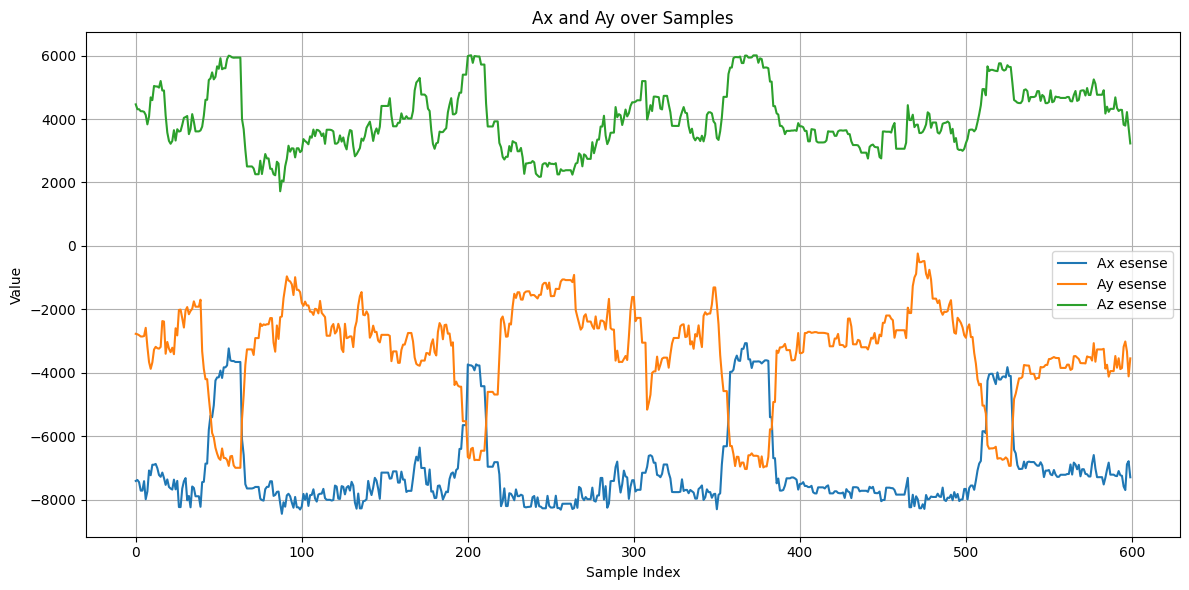

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df6_temp["Ax esense"], label="Ax esense")
plt.plot(df6_temp["Ay esense"], label="Ay esense")
plt.plot(df6_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df7 = pd.read_csv(r"C:\Users\mohit\Downloads\NiharikaSittingWaterwoBuffer63.csv")

df7


,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-07-01 17:35:19.572,2025-07-01T17:35:19.230087,3.699042,-9.071630,2.738967,0.524122,0.020769,0.140499,2025-07-01T17:35:19.511,-8085,-1857,692,286,-217,-878
1,2,2025-07-01 17:35:19.675,2025-07-01T17:35:19.230087,3.699042,-9.071630,2.738967,0.524122,0.020769,0.140499,2025-07-01T17:35:19.659,-8168,-1501,796,333,-165,-753
2,3,2025-07-01 17:35:19.770,2025-07-01T17:35:19.429975,1.041478,-8.561666,6.366182,1.925447,1.172861,2.145359,2025-07-01T17:35:19.679,-7642,-2569,1505,-531,-1041,35
3,4,2025-07-01 17:35:19.870,2025-07-01T17:35:19.529962,-1.649605,-4.778827,5.516241,1.159422,0.972497,0.890642,2025-07-01T17:35:19.841,-8051,-2709,1518,-285,101,-805
4,5,2025-07-01 17:35:19.960,2025-07-01T17:35:19.629353,-0.845153,-6.459556,5.762844,0.377515,0.333532,0.061087,2025-07-01T17:35:19.935,-7839,-2828,1831,-107,-35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,2025-07-01 17:36:19.061,2025-07-01T17:36:18.729316,-2.123657,-10.678140,4.520253,0.245568,-0.404393,-0.701273,2025-07-01T17:36:18.980,-7851,-1922,-565,-77,-337,461
596,597,2025-07-01 17:36:19.160,2025-07-01T17:36:18.829313,-1.355118,-9.686940,6.854599,0.853990,-0.653626,-0.535118,2025-07-01T17:36:19.155,-7918,-1719,-605,304,375,616
597,598,2025-07-01 17:36:19.261,2025-07-01T17:36:18.930870,-0.852336,-8.291121,6.121974,-0.085521,-0.422719,0.014661,2025-07-01T17:36:19.260,-8224,-1897,-487,-125,319,321
598,599,2025-07-01 17:36:19.360,2025-07-01T17:36:19.029532,-0.474052,-6.969521,6.126762,1.099557,-0.312763,-0.180816,2025-07-01T17:36:19.326,-8221,-1833,-442,-559,-95,-296


In [38]:
df7_temp = df7.iloc[:600]

df7_temp

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-07-01 17:35:19.572,2025-07-01T17:35:19.230087,3.699042,-9.071630,2.738967,0.524122,0.020769,0.140499,2025-07-01T17:35:19.511,-8085,-1857,692,286,-217,-878
1,2,2025-07-01 17:35:19.675,2025-07-01T17:35:19.230087,3.699042,-9.071630,2.738967,0.524122,0.020769,0.140499,2025-07-01T17:35:19.659,-8168,-1501,796,333,-165,-753
2,3,2025-07-01 17:35:19.770,2025-07-01T17:35:19.429975,1.041478,-8.561666,6.366182,1.925447,1.172861,2.145359,2025-07-01T17:35:19.679,-7642,-2569,1505,-531,-1041,35
3,4,2025-07-01 17:35:19.870,2025-07-01T17:35:19.529962,-1.649605,-4.778827,5.516241,1.159422,0.972497,0.890642,2025-07-01T17:35:19.841,-8051,-2709,1518,-285,101,-805
4,5,2025-07-01 17:35:19.960,2025-07-01T17:35:19.629353,-0.845153,-6.459556,5.762844,0.377515,0.333532,0.061087,2025-07-01T17:35:19.935,-7839,-2828,1831,-107,-35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,2025-07-01 17:36:19.061,2025-07-01T17:36:18.729316,-2.123657,-10.678140,4.520253,0.245568,-0.404393,-0.701273,2025-07-01T17:36:18.980,-7851,-1922,-565,-77,-337,461
596,597,2025-07-01 17:36:19.160,2025-07-01T17:36:18.829313,-1.355118,-9.686940,6.854599,0.853990,-0.653626,-0.535118,2025-07-01T17:36:19.155,-7918,-1719,-605,304,375,616
597,598,2025-07-01 17:36:19.261,2025-07-01T17:36:18.930870,-0.852336,-8.291121,6.121974,-0.085521,-0.422719,0.014661,2025-07-01T17:36:19.260,-8224,-1897,-487,-125,319,321
598,599,2025-07-01 17:36:19.360,2025-07-01T17:36:19.029532,-0.474052,-6.969521,6.126762,1.099557,-0.312763,-0.180816,2025-07-01T17:36:19.326,-8221,-1833,-442,-559,-95,-296


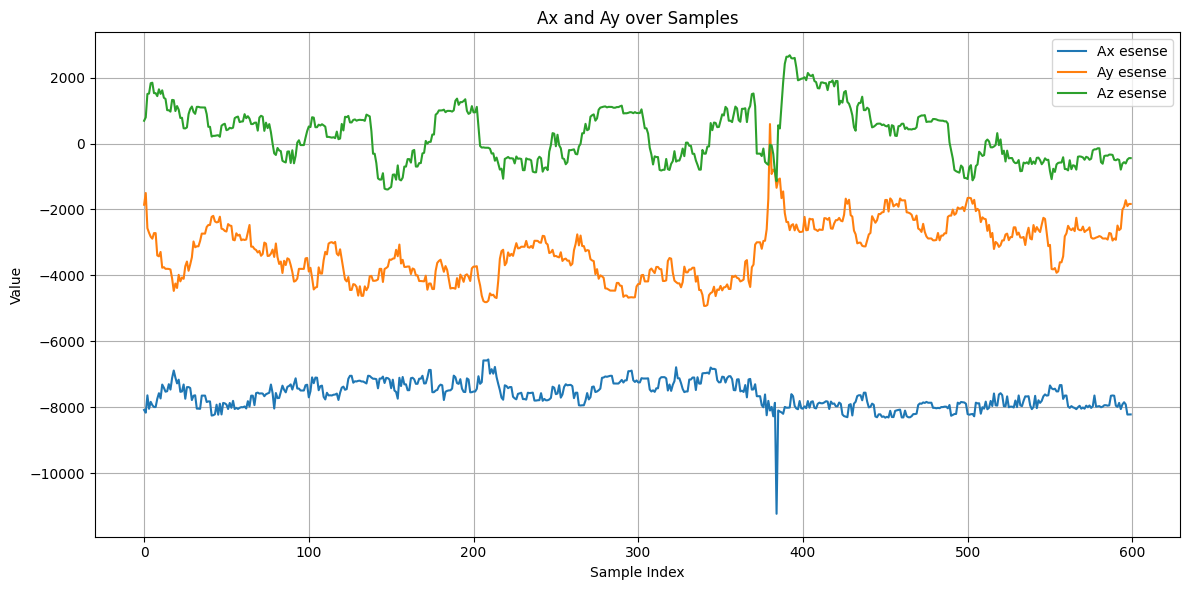

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df7_temp["Ax esense"], label="Ax esense")
plt.plot(df7_temp["Ay esense"], label="Ay esense")
plt.plot(df7_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
df8 = pd.read_csv(r"C:\Users\mohit\Downloads\AnushkaSittingWaterwoBuffer87.csv")

df8

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-07-01 18:15:52.374,2025-07-01T18:15:53.121202,-2.044648,-5.310339,12.035652,1.381777,-0.709825,-0.158825,2025-07-01T18:15:52.324,-3913,-6913,3860,355,-3,19
1,2,2025-07-01 18:15:52.469,2025-07-01T18:15:53.221430,-3.960010,-6.629545,9.471462,-0.059865,0.295659,0.224798,2025-07-01T18:15:52.436,-3836,-6647,3716,95,-83,59
2,3,2025-07-01 18:15:52.570,2025-07-01T18:15:53.321180,-5.075707,-2.700660,9.610326,1.353677,-0.294437,0.546114,2025-07-01T18:15:52.504,-3954,-6738,3964,-191,-293,328
3,4,2025-07-01 18:15:52.673,2025-07-01T18:15:53.421312,-2.801216,-3.842694,6.196194,-0.384845,0.185703,0.035430,2025-07-01T18:15:52.621,-3764,-6612,3571,-543,111,21
4,5,2025-07-01 18:15:52.770,2025-07-01T18:15:53.521079,-2.904167,-2.808398,7.702147,2.053729,0.268781,0.574213,2025-07-01T18:15:52.689,-3943,-6919,3536,-388,84,-113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1241,2025-07-01 18:17:56.570,2025-07-01T18:17:57.322796,-7.031770,-0.229843,5.777209,-1.103223,-0.891863,-0.896750,2025-07-01T18:17:56.533,-4324,-6815,2666,-292,-1070,-1502
1241,1242,2025-07-01 18:17:56.677,2025-07-01T18:17:57.424768,-7.228095,-1.620875,6.143522,-0.323759,-0.422719,-1.407434,2025-07-01T18:17:56.623,-4370,-7007,2621,288,-801,-1224
1242,1243,2025-07-01 18:17:56.770,2025-07-01T18:17:57.524048,-7.146692,-2.813187,7.022193,0.565661,-0.179594,-1.343904,2025-07-01T18:17:56.710,-4163,-6891,2653,-154,-804,-1293
1243,1244,2025-07-01 18:17:56.870,2025-07-01T18:17:57.622200,-6.224925,-3.627216,6.981492,-0.461814,0.056200,-1.003041,2025-07-01T18:17:56.832,-3691,-7506,2535,-594,-834,-665


In [41]:
df8_temp = df8.iloc[:600]

df8_temp

,id,ActualTime,WatchTimeStamp,Ax watch,Ay watch,Az watch,Gx watch,Gy watch,Gz watch,Esense TimeStamp,Ax esense,Ay esense,Az esense,Gx esense,Gy esense,Gz esense
0,1,2025-07-01 18:15:52.374,2025-07-01T18:15:53.121202,-2.044648,-5.310339,12.035652,1.381777,-0.709825,-0.158825,2025-07-01T18:15:52.324,-3913,-6913,3860,355,-3,19
1,2,2025-07-01 18:15:52.469,2025-07-01T18:15:53.221430,-3.960010,-6.629545,9.471462,-0.059865,0.295659,0.224798,2025-07-01T18:15:52.436,-3836,-6647,3716,95,-83,59
2,3,2025-07-01 18:15:52.570,2025-07-01T18:15:53.321180,-5.075707,-2.700660,9.610326,1.353677,-0.294437,0.546114,2025-07-01T18:15:52.504,-3954,-6738,3964,-191,-293,328
3,4,2025-07-01 18:15:52.673,2025-07-01T18:15:53.421312,-2.801216,-3.842694,6.196194,-0.384845,0.185703,0.035430,2025-07-01T18:15:52.621,-3764,-6612,3571,-543,111,21
4,5,2025-07-01 18:15:52.770,2025-07-01T18:15:53.521079,-2.904167,-2.808398,7.702147,2.053729,0.268781,0.574213,2025-07-01T18:15:52.689,-3943,-6919,3536,-388,84,-113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,2025-07-01 18:16:51.874,2025-07-01T18:16:52.620950,-3.040636,-0.610521,8.556877,-1.791057,-0.365297,1.010371,2025-07-01T18:16:51.821,-3967,-7159,2099,-82,-79,-266
596,597,2025-07-01 18:16:51.970,2025-07-01T18:16:52.721173,-2.597709,-5.992687,7.615956,-1.654223,0.227242,0.800233,2025-07-01T18:16:51.910,-3889,-7113,2165,74,-123,-352
597,598,2025-07-01 18:16:52.071,2025-07-01T18:16:52.820742,-5.779603,0.770933,6.301539,5.742133,0.229685,-0.938289,2025-07-01T18:16:51.995,-3847,-7456,1732,-366,342,-129
598,599,2025-07-01 18:16:52.173,2025-07-01T18:16:52.921272,-1.934515,6.928820,6.766014,1.156979,-0.862542,-0.200364,2025-07-01T18:16:52.089,-3923,-7158,1675,-331,-91,26


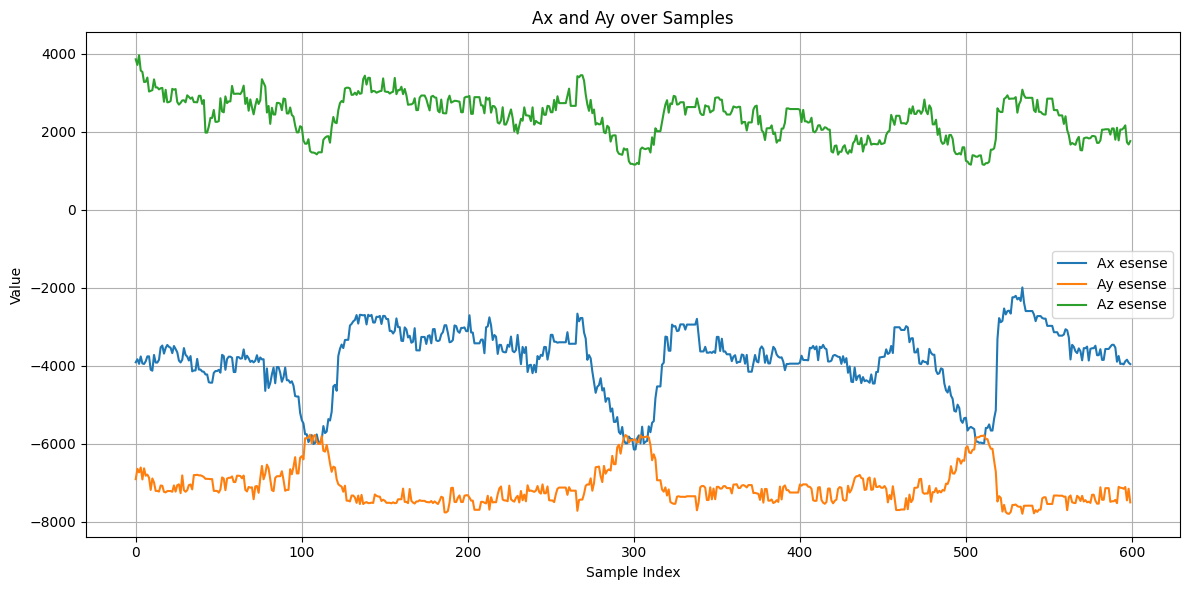

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df8_temp["Ax esense"], label="Ax esense")
plt.plot(df8_temp["Ay esense"], label="Ay esense")
plt.plot(df8_temp["Az esense"], label="Az esense")
plt.title("Ax and Ay over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()